# Dithering

Dithering é um processo de redução da quantização de uma imagem que cria a ilusão de que não foi perdida muita informação radiométrica. Ou seja, ela cria a ilusão de que não foram perdidos níveis de cores na quantização. Ele faz isso através de uma reconfiguração dos pixels ponto a ponto. Ao criar essa ilusão, o dithering minimiza o efeito forte de transição entre uma cor e outra, mas também reduz a nitidez da imagem e cria um notável padrão granulado na mesma.

Hoje em dia, o dithering tem aplicações em web-sites, transformando imagens com muitas cores para uma com poucas, reduzindo, assim, o tamanho do arquivo (e a largura de banda) sem prejudicar a qualidade. Outra aplicação se dá em edição de imagens, reduzindo fotos digitais de 48 ou 64bpp RAW-format para 24bpp RGB, por exemplo. E em jogos, a redução de configurações gráficas também é feita através de dithering. Ou seja, reduz-se a qualidade visual do jogo com a menor perda possível de tonalidades, para que este possa ser executado num PC de menor capacidade gráfica. 

Ao aplicarmos dithering em uma imagem, alteramos o valor do pixel para a nova quantização, comparando seu valor inicial com um limiar adotado, para assim, mudar o valor do pixel. Por exemplo, supondo que queremos transformar uma imagem de 8 bits (256 tons) para uma de 1 bit (2 tons), e o limiar adotado é o centro da cartela de cor (127), devemos analizar cada um dos pixels, comparando seu valor com o limiar. Se o seu valor inicial for maior que o limiar ele será setado para branco, se não, para preto. Por exemplo: um pixel com valor igual a 96 será configurado para preto, na imagem final. Esse é o conceito básico da aplicação de dithering, mas existem várias variações.

Neste notebook, abordaremos algumas das várias maneiras de aplicar dithering à uma imagem, começando pelo método mais básico, o dithering aleatório, e indo até métodos usuais como o filtro Floyd Steinberg. Ao final, faremos uma comparação gráfica dos vários métodos apresentados.  


In [3]:
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt

img = Image.open('../seminario/imagens/man_r2.tif')

img_quant = img.quantize(2,1)

## Dithering Aleatório
O meio mais básico de se aplicar dithering é gerar para cada pixel um valor aleatório entre 0:255 e compará-lo com o valor inicial do pixel. Se esse valor for maior que o limiar aleatório escolhido, o pixel é setado para branco, se não, para preto. Esse método, chamado de dithering aleatório, quase não é utilizado por deixar a imagem muito ruidosa. Mas, dependendo da aplicação e da imagem a ser processada, ele pode ser eficiente, já que é um método muito simples e rápido.

Abaixo mostramos uma imagem que foi quantizada pela forma simples de quantização e outra aplicando o dithering aleatório. As duas ocupam 1 bit, mas a que foi processada usando dithering consegue fornecer mais informação que a quantizada.

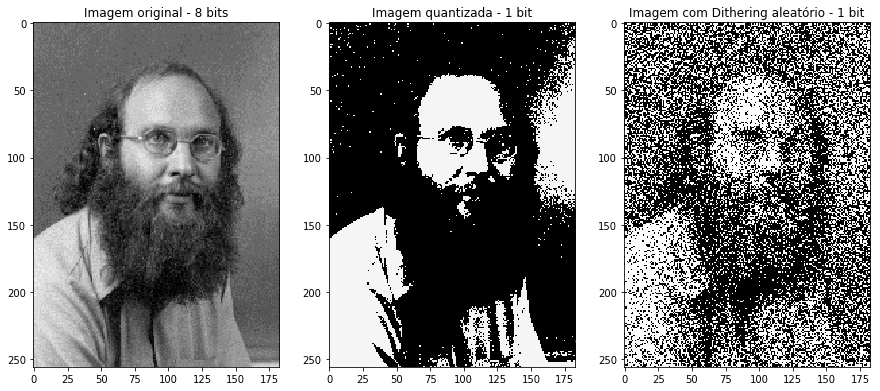

In [4]:
img_array = np.asarray(img)

def function_random_Dither(img_array):
    (M,N) = img_array.shape
    randon_dither = np.zeros((M,N))
    randon_limiar = np.random.randint(0,255,(M,N))

    for lin in range(M):
        for col in range(N):
            if img_array[lin,col]>=randon_limiar[lin,col]:
                   randon_dither[lin,col] = 255
    return randon_dither

randon_dither = function_random_Dither(img_array)

plt.figure(figsize=(15,8))
plt.subplot(131)
plt.imshow(img)
plt.title('Imagem original - 8 bits')
plt.subplot(132)
plt.imshow(img_quant)
plt.title('Imagem quantizada - 1 bit')
plt.subplot(133)
plt.imshow(randon_dither,cmap='gray',vmin=0,vmax=255)
plt.title('Imagem com Dithering aleatório - 1 bit');

## Dithering Ordenado

Neste método, uma matriz conhecida como matriz de limiar é adotada para se fazer a comparação com o valor inicial do pixel. A imagem é normalizada para um range que equivale ao número de elementos da matriz de limiar, em seguida ,cada pixel é comparado com o valor de limiar correspondente à posição na matriz de limiar. Se o valor do pixel for maior que o limiar, o pixel é setado para 255, se não, para 0. A matriz de limiar pode ser de vários tamanhos, mas o algorítmo mais conhecido para gerar essas matrizes (Bayer matrix) gera somente matrizes com tamanhos proporcionais à potencias de 2.

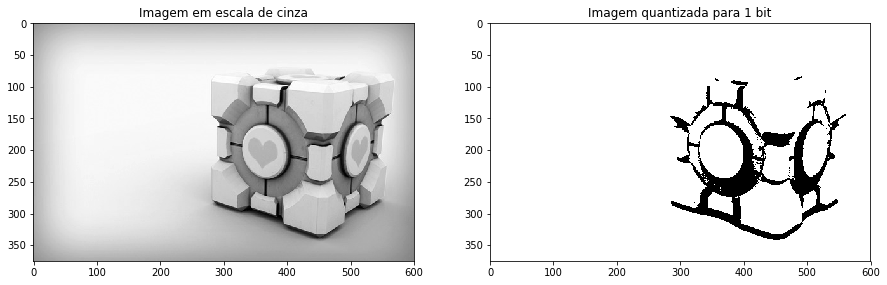

In [5]:
img2 = Image.open('../seminario/imagens/cube_gray.png')
img2_quant = img2.quantize(2,1)
img2_array= np.array(img2)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.imshow(img2_array,cmap='gray',vmin=0,vmax=255)
plt.title('Imagem em escala de cinza')
plt.subplot(122)
plt.imshow(img2_quant,cmap='gray',vmin=0,vmax=255)
plt.title('Imagem quantizada para 1 bit');


Neste exemplo, usaremos a imagem do cubo mostrada acima, pois ela mostra um resultado mais didático. Mostraremos a implementação do dithering ordenado utilizando matrizes de Bayer com potencias de 2, 4 e 8. Para melhor visualização do resultado, os arrays foram transformados para imagem, pois o 'plt.imshow' muda as configurações do arquivo para poder gerar a imagem.

In [7]:
m_limiar_2x2 = np.array([[0,2],
                        [3,1]])
m_limiar_4x4 = np.array([[0,8,2,10],
                                [12,4,14,6],
                                [3,11,1,9],
                                [15,7,13,5]])
m_limiar_8x8 = np.array([[0,48,12,60,3,51,15,63],
                                [32,16,44,28,35,19,47,31],
                                [8,56,4,52,11,59,7,55],
                                [40,24,36,20,43,27,39,23],
                                [2,50,14,62,1,49,13,61],
                                [34,18,46,30,33,17,45,29],
                                [10,58,6,54,9,57,5,53],
                                [42,26,38,22,41,25,37,21]])

Imagem com dithering ordenado tipo Bayer 2x2


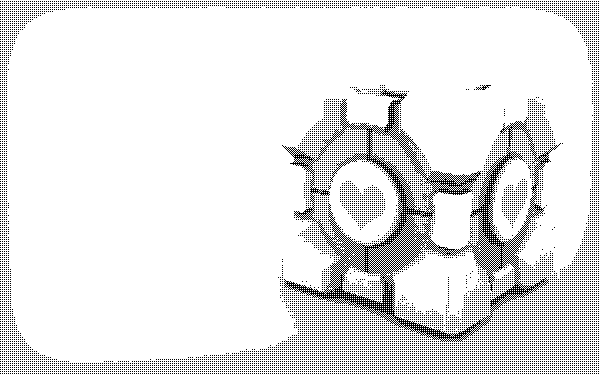

Imagem com dithering ordenado tipo Bayer 4x4


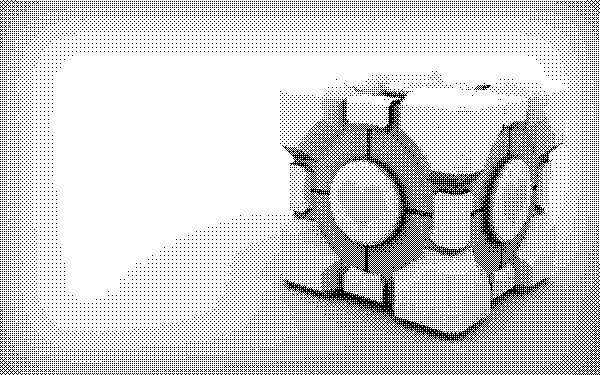

Imagem com dithering ordenado tipo Bayer 8x8


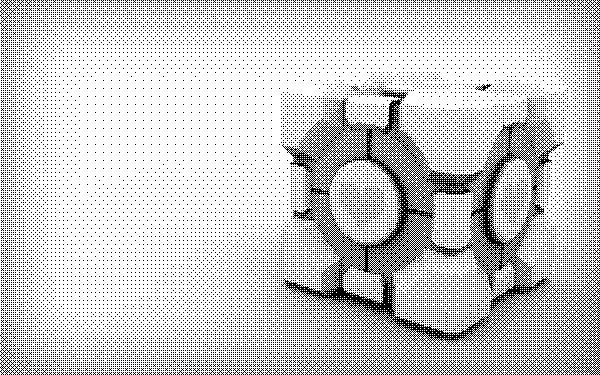

In [9]:
from IPython.display import display

def function_dithering_ordered(img_array,m_limiar):
    M = img_array.shape[0]
    N = img_array.shape[1]
    ordered_dither = np.zeros((M2,N2))

    mat=m_limiar
    n = mat.shape[0]

    norm = np.amax(img_array)/n**2
    img_norm = img_array/norm

    for col in range(N):
        for lin in range(M):
            if img_norm[lin,col] >=mat[(lin%n),(col%n)]:
                ordered_dither[lin,col] = 255
    return ordered_dither

ordered_dither = function_dithering_ordered(img2_array,m_limiar_2x2)

ordered_img_8x8 = Image.open('../seminario/imagens/cube_ordered_8x8.png')
ordered_img_4x4 = Image.open('../seminario/imagens/cube_ordered_4x4.png')
ordered_img = Image.fromarray(np.uint8(ordered_dither))

print('Imagem com dithering ordenado tipo Bayer 2x2')
display(ordered_img)
print('Imagem com dithering ordenado tipo Bayer 4x4')
display(ordered_img_4x4)
print('Imagem com dithering ordenado tipo Bayer 8x8')
display(ordered_img_8x8)

## Dithering por Difusão de Erro

Nos algoritimos de dithering por difusão de erro, a diferença entre o valor inicial do pixel e o limiar adotado é chamada de erro. Uma parcela desse erro é difundido pelos pixels adjacentes. A propoção de erro que irá para cada pixel adjacente é dada por uma matriz de erro, que é diferente para cada algoritmo. Nesse caso, o limiar (ou limiares) adotado é o centro do range de cor (para o caso de binário). Se forem mais cores, os limiares serão os centros dos intervalos de cor.

### Algorítmo de Floyd-Steinberg
O algoritmo mais conhecido de dithering por difusão de erro é o que foi publicado por Robert Floyd e Louis Steinberg em 1976, conhecido por Floyd-Steinberg Dithering, esse será o primeiro que iremos implementar aqui. A matriz de porcentagem de erro que será propagado é:

                                                            X   7
                                                        3   5   1

                                                         (1/16)

onde X é o pixel que está sendo processado no momento. Como a difusão de erro é feita para pixels posteriores e de linhas abaixo, a matriz original deve ser acrescentada de zeros nas laterais e no final, lembrando que esses zeros não devem entrar no cálculo do erro, eles são inseridos somente para receber o erro das colunas mais externas e da linha inferior. 

Imagem com dithering por difusão de erro tipo Floyd-Steinberg


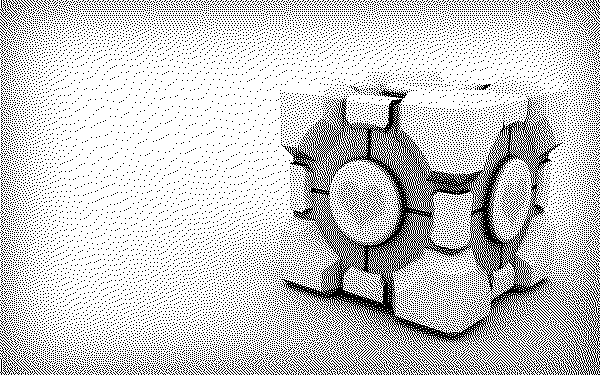

In [11]:
def function_floyde_stein_dither(img_array):
    M = img_array.shape[0]
    N = img_array.shape[1]
    
    #linhas de zeros adicionadas na imagem para poder processar as bordas corretamente
    array_col = np.zeros((1,M)).reshape(M, 1)    
    array_lin = np.zeros((1,N+2))
    img_fl_e_st = np.hstack((img_array,array_col))
    img_fl_e_st = np.hstack((array_col,img_fl_e_st))
    img_fl_e_st = np.vstack((img_fl_e_st,array_lin))

    floyde_stein_dither = np.zeros((M,N))
    limiar = 127

    for lin in range(M):
        for col in range(1,N+1):
            if img_fl_e_st[lin,col] >255:
                floyde_stein_dither[lin,col-1]=255
                erro=0
            else:
                var = limiar - img_fl_e_st[lin,col]
                if var>=0:
                    erro = img_fl_e_st[lin,col]
                else:
                    floyde_stein_dither[lin,col-1]=255
                    erro = img_fl_e_st[lin,col] - 255
            img_fl_e_st[lin,col+1] = (7/16)*erro+img_fl_e_st[lin,col+1]
            img_fl_e_st[lin+1,col-1] = (3/16)*erro+img_fl_e_st[lin+1,col-1]
            img_fl_e_st[lin+1,col] = (5/16)*erro+img_fl_e_st[lin+1,col]
            img_fl_e_st[lin+1,col+1] = (1/16)*erro+img_fl_e_st[lin+1,col+1]

    return floyde_stein_dither

floyde_stein_dither = function_floyde_stein_dither(img2_array)

floyde_stein_img = Image.fromarray(np.uint8(floyde_stein_dither)) 
print('Imagem com dithering por difusão de erro tipo Floyd-Steinberg')
display(floyde_stein_img)

A imagem gerada pelo algorítmo de Floyde-Steinberg é incrívelmente melhor que a quantizada para 1 bit, já que é possível ver detalhes do cubo que na imagem quantizada nós não vemos.

### Algorítmo de Jarvis, Judice, and Ninke (JJN)
Esse algorítmo possui o mesmo princípio de difusão de erro que o anterior. O que os difere é a porcentagem de erro que é propagado para cada pixel e o número de pixels que recebem esse erro. Aqui, pixels a duas linhas e colunas de distancia, para cada direção (menos para cima), recebem uma porcentagem de erro. A matriz de erro agora é:

                                                         X   7   5 
                                                 3   5   7   5   3
                                                 1   3   5   3   1

                                                       (1/48)
Sendo assim, agora devemos acrescentar duas colunas de zeros nas extremidades e duas linhas de zeros ao final da matriz, para que possamos processar os pixels dos cantos da imagem.

Imagem com dithering por difusão de erro tipo JJN


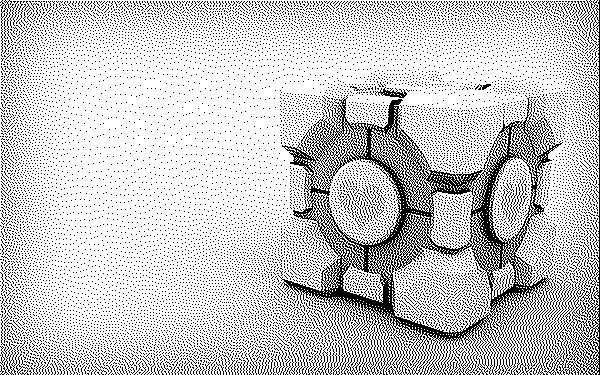

In [13]:
def function_jjn_dither(img_array):
    M = img_array.shape[0]
    N = img_array.shape[1]
    
    #linhas de zeros adicionadas na imagem para poder processar as bordas corretamente
    array_col = np.zeros((2,M)).reshape(M, 2)    
    array_lin = np.zeros((2,N+4))

    img_jjn = np.hstack((img2_array,array_col))
    img_jjn = np.hstack((array_col,img_jjn))
    img_jjn = np.vstack((img_jjn,array_lin))

    jjn_dither = np.zeros((M,N))
    limiar = 127

    for lin in range(M):
        for col in range(2,N+1):
            if img_jjn[lin,col] >255:
                jjn_dither[lin,col-2]=255
                erro=0
            else:
                var = limiar - img_jjn[lin,col]
                if var>=0:
                    erro = img_jjn[lin,col]
                else:
                    jjn_dither[lin,col-2]=255
                    erro = img_jjn[lin,col] - 255
            img_jjn[lin,col+1] = (7/48)*erro+img_jjn[lin,col+1]
            img_jjn[lin,col+2] = (5/48)*erro+img_jjn[lin,col+2]
            img_jjn[lin+1,col-2] = (3/48)*erro+img_jjn[lin+1,col-2]
            img_jjn[lin+1,col-1] = (5/48)*erro+img_jjn[lin+1,col-1]
            img_jjn[lin+1,col] = (7/48)*erro+img_jjn[lin+1,col]
            img_jjn[lin+1,col+1] = (5/48)*erro+img_jjn[lin+1,col+1]
            img_jjn[lin+1,col+2] = (3/48)*erro+img_jjn[lin+1,col+2]
            img_jjn[lin+2,col-2] = (1/48)*erro+img_jjn[lin+2,col-2]
            img_jjn[lin+2,col-1] = (3/48)*erro+img_jjn[lin+2,col-1]
            img_jjn[lin+2,col] = (5/48)*erro+img_jjn[lin+2,col]
            img_jjn[lin+2,col+1] = (3/48)*erro+img_jjn[lin+2,col+1]
            img_jjn[lin+2,col+2] = (1/48)*erro+img_jjn[lin+2,col+2]
            
    return jjn_dither

jjn_dither = function_jjn_dither(img2_array)

jjn_img = Image.fromarray(np.uint8(jjn_dither)) 
print('Imagem com dithering por difusão de erro tipo JJN')
display(jjn_img)

Analisando a imagem, podemos ver que há uma melhora na imagem resultante se compararmos com o método de Floyde-Steinberg. Isso se deve ao fato de que a matriz de erro propagante é maior, ou seja, o valor de um pixel interfere no valor de mais pixels a sua volta, distribuindo melhor o padrão de cinza na imagem resultante.

### Algorítmo de Stucki
O algorítmo proposto por Peter Stucki foi publicado 5 anos após o método JJN, apresentando mudanças que, segundo ele, melhoravam a qualidade da imagem. A mudança proposta foi trocar os valores da matriz de erro que não eram potencias de 2, por um valor que seja. Assim, o no lugar de 3 temos 2, no lugar de 5 temos 4 e no lugar de 7 temos 8. Isso muda também o valor da soma resultante, que é o divisor da matriz e que agora passa a ser 42. A nova matriz de erro é:

                                                         X   8   4 
                                                 2   4   8   4   2
                                                 1   2   4   2   1

                                                       (1/42)
Em termos de código, a única diferença é a porcentagem de erro inserido. Essa porcentagem gera sim uma melhora na imagem, diminuindo (um pouco) o aspecto granulado.

Imagem com dithering por difusão de erro tipo Stuck


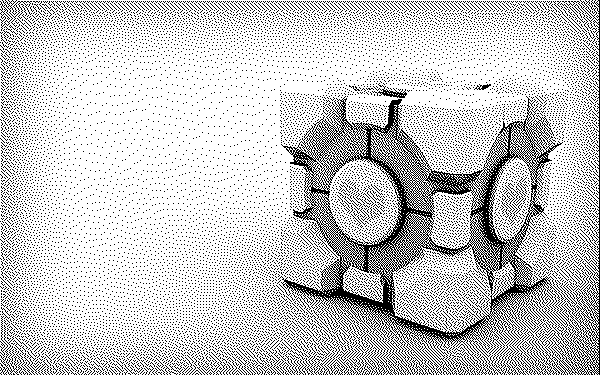

In [22]:
def function_stuck_dither(img_array):
    M = img_array.shape[0]
    N = img_array.shape[1]
    
    #linhas de zeros adicionadas na imagem para poder processar as bordas corretamente
    array_col = np.zeros((2,M)).reshape(M, 2)    
    array_lin = np.zeros((2,N+4))
    img_stuck = np.hstack((img2_array,array_col))
    img_stuck = np.hstack((array_col,img_stuck))
    img_stuck = np.vstack((img_stuck,array_lin))

    stuck_dither = np.zeros((M,N))
    limiar = 127

    for lin in range(M):
        for col in range(2,N+1):
            if img_stuck[lin,col] >255:
                stuck_dither[lin,col-2]=255
                erro=0
            else:
                var = limiar - img_stuck[lin,col]
                if var>=0:
                    erro = img_stuck[lin,col]
                else:
                    stuck_dither[lin,col-2]=255
                    erro = img_stuck[lin,col] - 255
            img_stuck[lin,col+1] = (8/42)*erro+img_stuck[lin,col+1]
            img_stuck[lin,col+2] = (4/42)*erro+img_stuck[lin,col+2]
            img_stuck[lin+1,col-2] = (2/42)*erro+img_stuck[lin+1,col-2]
            img_stuck[lin+1,col-1] = (4/42)*erro+img_stuck[lin+1,col-1]
            img_stuck[lin+1,col] = (8/42)*erro+img_stuck[lin+1,col]
            img_stuck[lin+1,col+1] = (4/42)*erro+img_stuck[lin+1,col+1]
            img_stuck[lin+1,col+2] = (2/42)*erro+img_stuck[lin+1,col+2]
            img_stuck[lin+2,col-2] = (1/42)*erro+img_stuck[lin+2,col-2]
            img_stuck[lin+2,col-1] = (2/42)*erro+img_stuck[lin+2,col-1]
            img_stuck[lin+2,col] = (4/42)*erro+img_stuck[lin+2,col]
            img_stuck[lin+2,col+1] = (2/42)*erro+img_stuck[lin+2,col+1]
            img_stuck[lin+2,col+2] = (1/42)*erro+img_stuck[lin+2,col+2]
    return stuck_dither

stuck_dither = function_stuck_dither(img2_array)

stuck_img = Image.fromarray(np.uint8(stuck_dither)) 
print('Imagem com dithering por difusão de erro tipo Stuck')
display(stuck_img)

## Comparando os métodos

Agora vamos ver uma comparação entre os métodos apresentados aqui. É possível ver que todos os métodos melhoram a vizualição do objeto se comparado com a quantização simples, ou seja, todos eles podem ser utilizados, dependendo da aplicação (até mesmo o dither aleatório). 

É de se esperar que a imagem resultante não fique igual à original, mas alguns métodos mostram o objeto muito parecido com o original, mesmo possuindo somente dois níveis de cores. Quanto mais níveis de cores, mais próximo ao original à imagem 'ditherizada' será. Mas, por outro lado, quanto mais tons de cinza a imagem 'ditherizada' possuir maior será o seu arquivo, e mais ele se aproximará do tamanho do arquivo original. 

Avaliando para o caso estudado, em que as imagens foram 'ditherizadas' para 1 bit (2 cores), os seus arquivos apresentaram uma redução significativa, mas não se comparada com a imagem quantizada. As que possuem menor tamanho são as que foram processadas usando o conceito de Dithering ordenado. Sendo assim, deve-se avaliar bem qual método de Dithering vale a pena para sua aplicação.

                                        Imagem original --------- 64 KB
                                        Quantização simples ----- 3,54 KB
                                        Dither aleatório -------- 36,6 KB
                                        Dither Bayer 2x2 -------- 5,25 KB
                                        Dither Bayer 4x4 -------- 6,97 KB
                                        Dither Bayer 8x8 -------- 9,22 KB
                                        Dither Floyde_Steinberg - 34,2 KB
                                        Dither JJN -------------- 36,7 KB
                                        Dither Stuck ------------ 35 KB


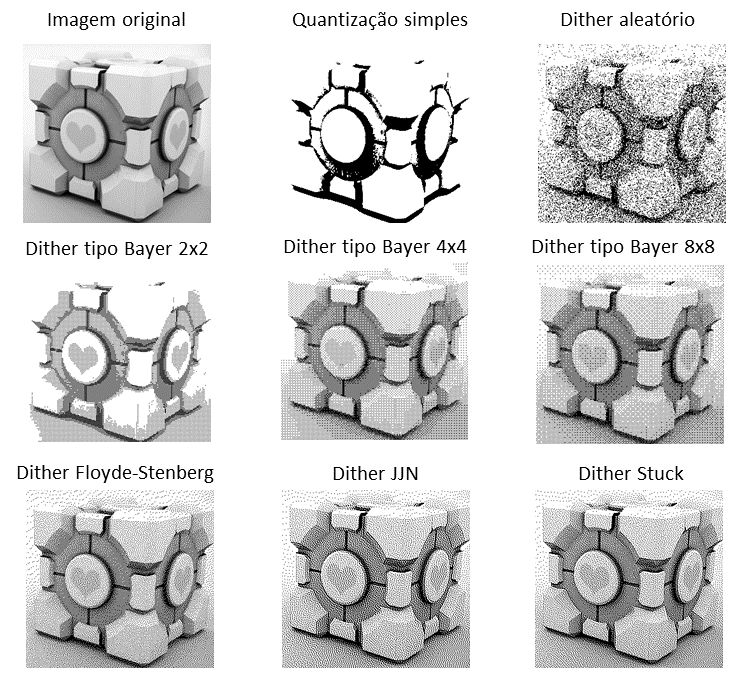

In [10]:
comp_img = Image.open('../seminario/imagens/comparacao_cinza.png')
comp_img

Vale ressaltar que eu salvei as imagens geradas pelos métodos apresentados e criei uma imagem de comparação entre elas, para que a visualização fosse mais didática.